# Breast Cancer Classification

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier, RandomForestClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer

import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = load_breast_cancer()

df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
df['target'] = dataset.target

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [5]:
s = pd.value_counts(df.target)

num_of_benign = s[0]
num_of_malignant = s[1]
total_cases = len(df)

percent_b = num_of_benign / total_cases
percent_m = num_of_malignant / total_cases

print("Distribution between Benign and Malignant\nPercent Benign: {0: .3f}\nPercent Malignant: {1: .3f}".format(percent_b, percent_m))

Distribution between Benign and Malignant
Percent Benign:  0.373
Percent Malignant:  0.627


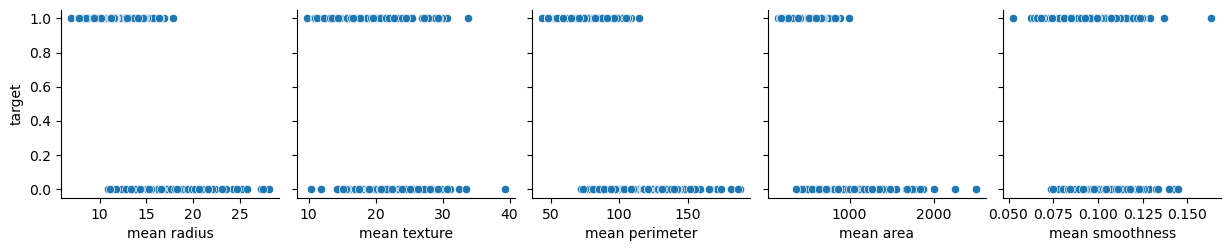

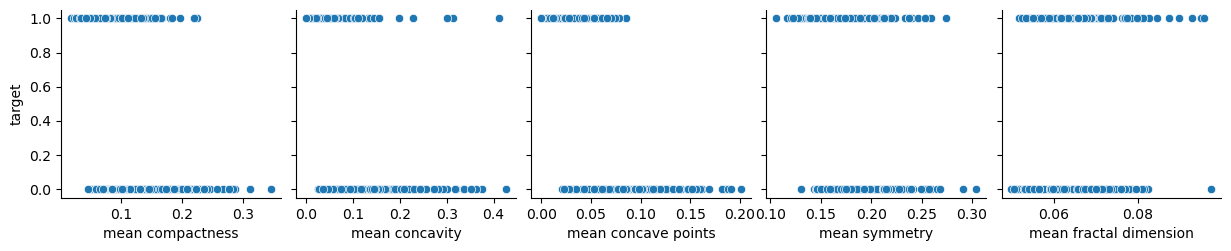

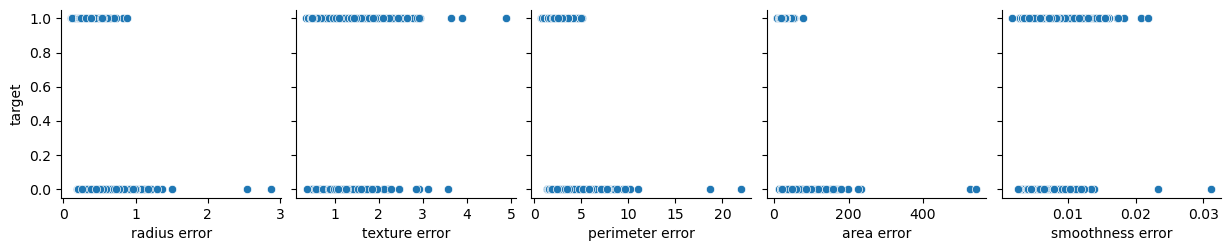

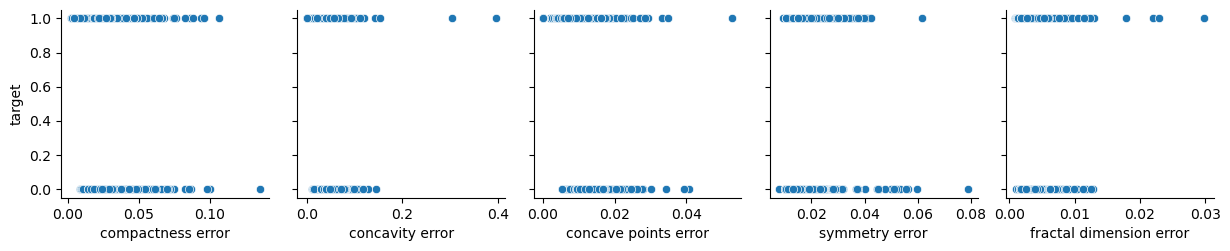

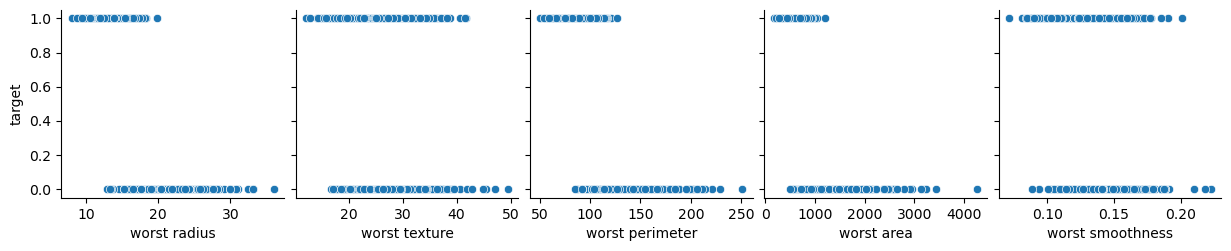

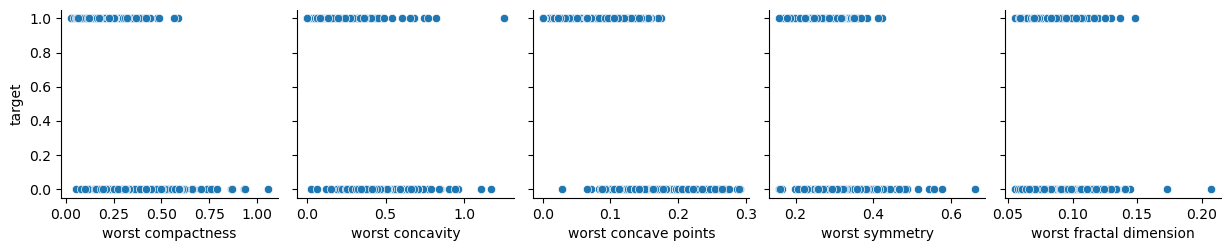

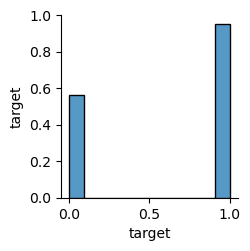

In [6]:
for i in range(0, len(df.columns), 5):
    sns.pairplot(data = df, x_vars = df.columns[i:i+5], y_vars=['target'])

In [7]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3-q1

df = df[~((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).any(axis = 1)]

In [8]:
for i in range(0, len(df.columns), 5):
    sns.pairplot(data = df, x_vars = df.columns[i:i+5], y_vars = ['target'])

In [9]:
p = df.hist(figsize = (20,20))

In [10]:
print(df.target.value_counts())
p = df.target.value_counts().plot(kind="bar")

1    300
0     98
Name: target, dtype: int64


In [11]:
plt.figure(figsize = (20, 6))
heatmap = sns.heatmap(df.corr(), vmin = -1, vmax = 1)
heatmap

<AxesSubplot:>

In [12]:
features = list(df.columns)
features = ['mean texture', 'mean area', 'mean smoothness', 'mean compactness',
           'mean concavity', 'mean symmetry', 'mean fractal dimension',
           'texture error', 'area error', 'smoothness error',
           'compactness error', 'concavity error', 'concave points error',
           'symmetry error', 'fractal dimension error',
           'worst smoothness', 'worst compactness', 'worst concavity',
           'worst symmetry', 'worst fractal dimension']

X = df[features]

In [13]:
X.head()

,mean texture,mean area,mean smoothness,mean compactness,mean concavity,mean symmetry,mean fractal dimension,texture error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst smoothness,worst compactness,worst concavity,worst symmetry,worst fractal dimension
6,19.98,1040.0,0.09463,0.10900,0.11270,0.1794,0.05742,0.7732,53.91,0.004314,0.013820,0.02254,0.010390,0.01369,0.002179,0.1442,0.2576,0.3784,0.3063,0.08368
7,20.83,577.9,0.11890,0.16450,0.09366,0.2196,0.07451,1.3770,50.96,0.008805,0.030290,0.02488,0.014480,0.01486,0.005412,0.1654,0.3682,0.2678,0.3196,0.11510
10,23.24,797.8,0.08206,0.06669,0.03299,0.1528,0.05697,1.1870,40.51,0.004029,0.009269,0.01101,0.007591,0.01460,0.003042,0.1181,0.1551,0.1459,0.2948,0.08452
11,17.89,781.0,0.09710,0.12920,0.09954,0.1842,0.06082,0.9849,54.16,0.005771,0.040610,0.02791,0.012820,0.02008,0.004144,0.1396,0.5609,0.3965,0.3792,0.10480
13,23.95,782.7,0.08401,0.10020,0.09938,0.1847,0.05338,1.0780,36.58,0.009769,0.031260,0.05051,0.019920,0.02981,0.003002,0.1131,0.1924,0.2322,0.2809,0.06287


In [14]:
X = (X - np.min(X)) / (np.max(X) - np.min(X))
y = df['target']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [16]:
knn = KNeighborsClassifier()
knnModel = knn.fit(X_train, y_train)
knnPred = knn.predict(X_test)
print(classification_report(y_test, knnPred))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91        25
           1       0.93      1.00      0.96        55

    accuracy                           0.95        80
   macro avg       0.97      0.92      0.94        80
weighted avg       0.95      0.95      0.95        80



In [17]:
dt = DecisionTreeClassifier()
dtModel = dt.fit(X_train, y_train)
dtPred = dt.predict(X_test)
print(classification_report(y_test, dtPred))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92        25
           1       0.95      0.98      0.96        55

    accuracy                           0.95        80
   macro avg       0.95      0.93      0.94        80
weighted avg       0.95      0.95      0.95        80



In [18]:
svm = SVC()
svmModel = svm.fit(X_train, y_train)
svmPred = svm.predict(X_test)
print(classification_report(y_test, svmPred))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91        25
           1       0.93      1.00      0.96        55

    accuracy                           0.95        80
   macro avg       0.97      0.92      0.94        80
weighted avg       0.95      0.95      0.95        80



In [19]:
estimators = [('svm', svm), ('KNN', knn), ('DecisionTree', dt)]
ensemble = VotingClassifier(estimators, voting = 'hard')

ensembleModel = ensemble.fit(X_train, y_train)
ensemblePred = ensemble.predict(X_test)
print(classification_report(y_test, ensemblePred))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91        25
           1       0.93      1.00      0.96        55

    accuracy                           0.95        80
   macro avg       0.97      0.92      0.94        80
weighted avg       0.95      0.95      0.95        80



In [20]:
start = time.time()
param_dist = {'max_depth' : [2, 3, 4],
              'bootstrap' : [True, False],
              'max_features' : ['auto', 'sqrt', 'log2', None],
              'criterion' : ['gini', 'entropy']}

fit_rf = RandomForestClassifier()
cv_rf = GridSearchCV(fit_rf, cv = 10,
                    param_grid = param_dist,
                    n_jobs = 3)

rfModel = cv_rf.fit(X_train, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto'}
Time taken in grid search:  15.29


In [21]:
rfPred = cv_rf.predict(X_test)
print(classification_report(y_test, rfPred))

              precision    recall  f1-score   support

           0       1.00      0.76      0.86        25
           1       0.90      1.00      0.95        55

    accuracy                           0.93        80
   macro avg       0.95      0.88      0.91        80
weighted avg       0.93      0.93      0.92        80



In [22]:
adaBoost = AdaBoostClassifier()
abModel = adaBoost.fit(X_train, y_train)
abPred = adaBoost.predict(X_test)
print(classification_report(y_test, abPred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        25
           1       0.95      1.00      0.97        55

    accuracy                           0.96        80
   macro avg       0.97      0.94      0.95        80
weighted avg       0.96      0.96      0.96        80



In [23]:
RandomForestClassifier

sklearn.ensemble._forest.RandomForestClassifier

In [24]:
randomForest = RandomForestClassifier()
RFmodel = randomForest.fit(X_train, y_train)
RFPred = randomForest.predict(X_test)
print(classification_report(y_test, RFPred))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91        25
           1       0.93      1.00      0.96        55

    accuracy                           0.95        80
   macro avg       0.97      0.92      0.94        80
weighted avg       0.95      0.95      0.95        80

